In [1]:
!python --version

Python 3.8.13


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
datasets = ['BDG-2']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        print(files)
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <=1]
            #print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [6]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

BDG-2
['results/BDG-2\\agg_metrics_Bear_clean=2016.csv', 'results/BDG-2\\agg_metrics_Bear_clean=2017.csv', 'results/BDG-2\\agg_metrics_Fox_clean=2016.csv', 'results/BDG-2\\agg_metrics_Fox_clean=2017.csv', 'results/BDG-2\\agg_metrics_Panther_clean=2017.csv', 'results/BDG-2\\agg_metrics_Rat_clean=2016.csv', 'results/BDG-2\\agg_metrics_Rat_clean=2017.csv']
results/BDG-2\agg_metrics_Bear_clean=2016.csv (78, 9)
results/BDG-2\agg_metrics_Bear_clean=2017.csv (91, 9)
results/BDG-2\agg_metrics_Fox_clean=2016.csv (132, 9)
results/BDG-2\agg_metrics_Fox_clean=2017.csv (133, 9)
results/BDG-2\agg_metrics_Panther_clean=2017.csv (105, 9)
results/BDG-2\agg_metrics_Rat_clean=2016.csv (277, 9)
results/BDG-2\agg_metrics_Rat_clean=2017.csv (262, 9)
BDG-2 1078 

(1078, 11)


In [7]:
test_agg

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Orville,7.022544,49.316121,3.841863,0.105823,0.090249,0.182645,0.797762
1,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Lidia,2.765692,7.649050,1.701467,0.122183,0.117650,0.204752,0.551186
2,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Lewis,4.074251,16.599522,2.299496,0.097163,0.088862,0.170408,0.445932
3,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_science_Alison,3.353080,11.243146,2.357581,0.023003,0.022982,0.032928,0.524908
4,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Darrell,14.779226,218.425535,8.158525,0.240978,0.188938,0.355557,0.568964
...,...,...,...,...,...,...,...,...,...,...,...
257,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_education_Jena,23.062826,531.893929,14.239778,0.092436,0.084965,0.142636,0.531711
258,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_office_Loyd,10.705801,114.614181,6.596137,0.126034,0.118310,0.201451,0.718104
259,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_education_Tania,72.036061,5189.194134,45.647125,10.088113,0.325679,0.327003,3.117310
260,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Rosemarie,1.718604,2.953600,1.083797,0.105958,0.105037,0.159349,0.696623


In [8]:
test_agg[['filename', 'building', 'NRMSE']].sort_values(by='NRMSE', ascending = False)

,filename,building,NRMSE
25,Fox_clean=2016.csv,Fox_assembly_Jerrod,4.393452
24,Fox_clean=2017.csv,Fox_assembly_Jerrod,3.376229
126,Fox_clean=2017.csv,Fox_warehouse_Lorretta,1.566594
125,Fox_clean=2016.csv,Fox_warehouse_Lorretta,1.557704
49,Rat_clean=2016.csv,Rat_assembly_Jannie,1.245896
...,...,...,...
90,Fox_clean=2017.csv,Fox_education_Claude,0.027074
73,Fox_clean=2017.csv,Fox_education_Otilia,0.025392
10,Fox_clean=2017.csv,Fox_education_Willis,0.022830
66,Bear_clean=2016.csv,Bear_parking_Gordon,0.018028


In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1078.000000,1078.000000
mean,0.110276,0.188643
std,0.064672,0.207291
min,0.009220,0.014372
25%,0.067577,0.104378
50%,0.099477,0.157232
75%,0.138893,0.222834
max,0.439576,4.393452


## agg - Test - ALL

In [10]:
combined = test_agg

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

res_agg1.mul(100).round(2)

SMAPE               NRMSE              
              mean   std median   mean    std median
result_type                                         
agg_metrics  11.03  6.47   9.95  18.86  20.73  15.72

In [11]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Orville,7.022544,49.316121,3.841863,0.105823,0.090249,0.182645,0.797762
1,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Lidia,2.765692,7.649050,1.701467,0.122183,0.117650,0.204752,0.551186
2,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Lewis,4.074251,16.599522,2.299496,0.097163,0.088862,0.170408,0.445932
3,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_science_Alison,3.353080,11.243146,2.357581,0.023003,0.022982,0.032928,0.524908
4,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Darrell,14.779226,218.425535,8.158525,0.240978,0.188938,0.355557,0.568964
...,...,...,...,...,...,...,...,...,...,...,...
257,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_education_Jena,23.062826,531.893929,14.239778,0.092436,0.084965,0.142636,0.531711
258,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_office_Loyd,10.705801,114.614181,6.596137,0.126034,0.118310,0.201451,0.718104
259,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_education_Tania,72.036061,5189.194134,45.647125,10.088113,0.325679,0.327003,3.117310
260,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Rosemarie,1.718604,2.953600,1.083797,0.105958,0.105037,0.159349,0.696623


In [12]:
combined.filename.value_counts()

filename
Rat_clean=2016.csv        277
Rat_clean=2017.csv        262
Fox_clean=2017.csv        133
Fox_clean=2016.csv        132
Panther_clean=2017.csv    105
Bear_clean=2017.csv        91
Bear_clean=2016.csv        78
Name: count, dtype: int64

## add - Test vs. Finetuned - by dataset

In [12]:
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

res_agg2.mul(100).round(2)

,,NRMSE
,,median
result_type,dataset,
agg_metrics,BDG-2,15.72


In [14]:
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

res_agg2.mul(100).round(2)

NRMSE
                                           median
result_type dataset filename                     
agg_metrics BDG-2   Bear_clean=2016.csv     12.73
                    Bear_clean=2017.csv     15.26
                    Fox_clean=2016.csv      13.62
                    Fox_clean=2017.csv      13.89
                    Panther_clean=2017.csv  12.41
                    Rat_clean=2016.csv      16.37
                    Rat_clean=2017.csv      17.59

In [17]:
print(test_agg.building[0])
    
test_agg['building_type'] = test_agg.building.apply(lambda s: s.split('_')[1])
test_agg['site'] = test_agg.building.apply(lambda s: s.split('_')[0])

0    Panther_parking_Lorriane
0         Bear_public_Orville
0         Bear_public_Orville
0           Rat_public_Emilee
0         Fox_lodging_Stephen
0           Rat_public_Emilee
0         Fox_lodging_Stephen
Name: building, dtype: object


In [56]:
test_agg.building_type.value_counts()

building_type
education    456
public       190
assembly     149
office       117
lodging       78
parking       21
warehouse     14
health        14
other         13
retail        10
science        4
utility        4
religion       4
food           4
Name: count, dtype: int64

In [57]:
test_agg.site.value_counts()

site
Rat        539
Fox        265
Bear       169
Panther    105
Name: count, dtype: int64

In [24]:
combined

,result_type,dataset,filename,building,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,...,wQuantileLoss[0.4],wQuantileLoss[0.5],wQuantileLoss[0.6],wQuantileLoss[0.7],wQuantileLoss[0.8],wQuantileLoss[0.9],mean_absolute_QuantileLoss,mean_wQuantileLoss,MAE_Coverage,OWA
0,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_parking_Lorriane,3.701057,5482.031468,39233.831818,9.132642,0.721462,2.090821,...,0.150872,0.139727,0.129416,0.114290,0.093831,0.065910,4830.294205,0.123116,0.391056,NaN
1,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_lodging_Cora,352.246938,64137.624405,584981.336426,136.168840,6.832340,2.302774,...,0.119828,0.109640,0.099964,0.086476,0.068520,0.045278,57272.582253,0.097905,0.351769,NaN
2,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_office_Hannah,10.928140,10385.833069,26198.461254,6.098338,2.010411,1.264060,...,0.344460,0.396429,0.382343,0.349120,0.292062,0.205529,7933.795922,0.302834,0.335294,NaN
3,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_lodging_Hattie,232.073197,52347.057053,570663.720947,132.836062,7.258955,1.767562,...,0.097649,0.091730,0.085495,0.075826,0.061745,0.041562,45134.848169,0.079092,0.380918,NaN
4,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_education_Teofila,1036.850185,93159.787811,683098.141846,159.007947,12.733935,1.887624,...,0.140089,0.136378,0.131854,0.120056,0.100963,0.073557,79718.998014,0.116702,0.382185,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_education_Delma,715.152871,77788.348686,401779.242432,93.524032,13.562831,1.480960,...,0.192312,0.193610,0.193208,0.190008,0.183740,0.173643,74307.574389,0.184946,0.229154,NaN
128,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_office_Edythe,142.597610,37890.283470,492979.118896,114.753054,11.761550,0.811486,...,0.077992,0.076860,0.074322,0.070744,0.065417,0.057753,35522.073708,0.072056,0.261608,NaN
129,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_assembly_Carlos,701.685058,68098.797722,500324.597656,116.462895,14.476728,1.164722,...,0.138343,0.136109,0.131791,0.125806,0.117120,0.104810,64402.644614,0.128722,0.275435,NaN
130,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_education_Jaclyn,357.621611,56003.231888,818528.302246,190.532659,9.450811,1.836581,...,0.064000,0.068419,0.069673,0.068292,0.063158,0.051069,47204.613399,0.057670,0.227524,NaN


Index(['Parking', 'Science', 'Lodging', 'Other', 'Health', 'Public',
       'Education', 'Food', 'Office', 'Warehouse', 'Assembly', 'Utility',
       'Retail', 'Religion'],
      dtype='object', name='building_type')


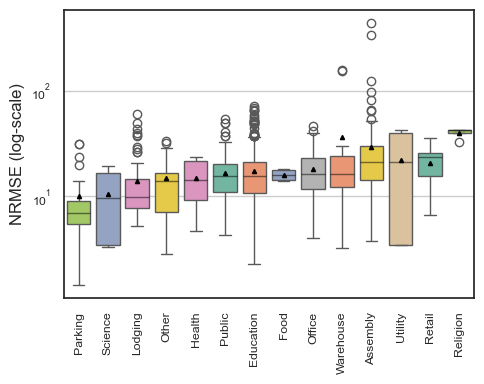

In [15]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      #'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=1)


plt.figure(figsize=(5, 4))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()

test_agg1.NRMSE = test_agg1.NRMSE * 100

test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["building_type"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='building_type', y='NRMSE', fill=True, hue='building_type',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.5),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1)
res.tick_params(labelsize=8.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log-scale)")
#plt.ylim(0,120)
plt.xlabel("")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("chronos-bdg-error-building-type-boxplot.pdf", bbox_inches='tight')
plt.show()

In [28]:
combined.columns

Index(['result_type', 'dataset', 'filename', 'building', 'MSE', 'abs_error',
       'abs_target_sum', 'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE',
       'sMAPE', 'MSIS', 'num_masked_target_values', 'QuantileLoss[0.1]',
       'Coverage[0.1]', 'QuantileLoss[0.2]', 'Coverage[0.2]',
       'QuantileLoss[0.3]', 'Coverage[0.3]', 'QuantileLoss[0.4]',
       'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]',
       'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]',
       'Coverage[0.7]', 'QuantileLoss[0.8]', 'Coverage[0.8]',
       'QuantileLoss[0.9]', 'Coverage[0.9]', 'RMSE', 'NRMSE', 'ND',
       'wQuantileLoss[0.1]', 'wQuantileLoss[0.2]', 'wQuantileLoss[0.3]',
       'wQuantileLoss[0.4]', 'wQuantileLoss[0.5]', 'wQuantileLoss[0.6]',
       'wQuantileLoss[0.7]', 'wQuantileLoss[0.8]', 'wQuantileLoss[0.9]',
       'mean_absolute_QuantileLoss', 'mean_wQuantileLoss', 'MAE_Coverage',
       'OWA'],
      dtype='object')

In [85]:
test_agg1 = combined.copy()
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
cols = ['result_type', 'building_type', 'NRMSE']
res_agg2 = test_agg1[cols].groupby(['result_type', 'building_type']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})
res_agg2

res_agg2 = pd.DataFrame(res_agg2)
res_agg2

NRMSE
                             median
result_type building_type          
Fine-tuned  assembly       0.244521
            education      0.182651
            food           0.168365
            health         0.180543
            lodging        0.127200
            office         0.193726
            other          0.141732
            parking        0.107105
            public         0.179209
            religion       0.450831
            retail         0.257869
            science        0.110881
            utility        0.210819
            warehouse      0.214591
Zero-shot   assembly       0.291628
            education      0.252529
            food           0.354515
            health         0.243345
            lodging        0.162444
            office         0.285899
            other          0.207212
            parking        0.268820
            public         0.197181
            religion       0.494437
            retail         0.410544
            science        0.137848
            utility        0.260709
            warehouse      0.227780

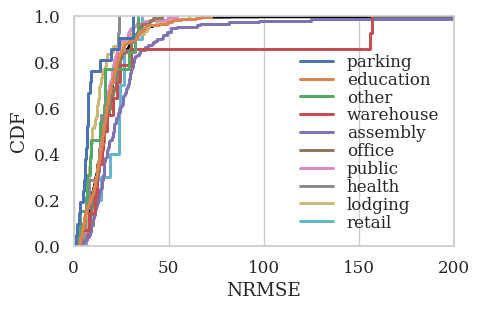

In [12]:
# sns.set()  # crazy big
sns.set(style="whitegrid", font_scale=1.1)

date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(5, 3.3))
fig, ax = plt.subplots()


copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

copy_df = copy_df.sort_values('NRMSE')

b_types = [
    'parking', 
           'education', 
    'other',
    'warehouse', 
    #'science', 'utility',
    'assembly', 'office', 'public', 
    'health', 
    'lodging', 'retail',
#       'food', 'religion'
]
copy_df = copy_df[copy_df.building_type.isin(b_types)]
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='building_type', ax=ax, lw=2.15)
# ax_s.set_xscale('log')
ax_s.set_xlim(0,200)
# sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-bdg-error-building-type-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [94]:
copy_df.building_type.value_counts()

building_type
education    456
public       190
assembly     149
office       117
lodging       78
parking       21
health        14
warehouse     14
other         13
retail        10
utility        4
science        4
food           4
religion       4
Name: count, dtype: int64

In [11]:
copy_df = test_agg.reset_index()
# copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

In [37]:
test_agg[test_agg['NRMSE'] > 0.4].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636
126,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_warehouse_Lorretta,26.921459,724.764952,10.696243,0.808096,0.416424,1.566594,1.222950
125,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_warehouse_Lorretta,29.145423,849.455653,11.802278,0.883911,0.420987,1.557704,1.124059
49,agg_metrics,BDG-2,Rat_clean=2016.csv,Rat_assembly_Jannie,1.011694,1.023524,0.250191,1.120933,0.236915,1.245896,4.526830
46,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Jannie,0.828810,0.686927,0.200159,1.095171,0.168138,0.971975,8.019477
65,agg_metrics,BDG-2,Panther_clean=2017.csv,Panther_assembly_David,54.855001,3009.071083,17.425651,0.206027,0.168764,0.816939,0.952359
18,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Arnold,0.409803,0.167939,0.167108,0.190384,0.211795,0.722307,0.852610
25,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Santos,6.064373,36.776624,3.078666,0.342325,0.255427,0.685138,0.957455
23,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Santos,5.619677,31.580772,2.812745,0.319020,0.252772,0.665096,0.808884


In [37]:
copy_df = test_agg
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'].value_counts()

site
Rat        539
Fox        265
Bear       169
Panther    105
Name: count, dtype: int64

In [50]:
copy_df = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False)
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

In [51]:
grouped = copy_df.groupby('site')

In [52]:
for site in copy_df.site.unique():
    print(site, grouped.get_group(site).building.unique().shape)

Fox (5,)
Rat (6,)
Panther (2,)
Bear (4,)


In [53]:
grouped = copy_df.groupby('building_type')

In [54]:
grouped.head()

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL,site,building_type
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193,Fox,assembly
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636,Fox,assembly
126,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_warehouse_Lorretta,26.921459,724.764952,10.696243,0.808096,0.416424,1.566594,1.222950,Fox,warehouse
125,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_warehouse_Lorretta,29.145423,849.455653,11.802278,0.883911,0.420987,1.557704,1.124059,Fox,warehouse
49,agg_metrics,BDG-2,Rat_clean=2016.csv,Rat_assembly_Jannie,1.011694,1.023524,0.250191,1.120933,0.236915,1.245896,4.526830,Rat,assembly
46,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Jannie,0.828810,0.686927,0.200159,1.095171,0.168138,0.971975,8.019477,Rat,assembly
65,agg_metrics,BDG-2,Panther_clean=2017.csv,Panther_assembly_David,54.855001,3009.071083,17.425651,0.206027,0.168764,0.816939,0.952359,Panther,assembly
18,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Arnold,0.409803,0.167939,0.167108,0.190384,0.211795,0.722307,0.852610,Bear,education
25,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Santos,6.064373,36.776624,3.078666,0.342325,0.255427,0.685138,0.957455,Bear,education
23,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Santos,5.619677,31.580772,2.812745,0.319020,0.252772,0.665096,0.808884,Bear,education


In [55]:
for type in copy_df.building_type.unique():
    print(type, grouped.get_group(type).shape)

assembly (10, 13)
warehouse (2, 13)
education (12, 13)
lodging (1, 13)
public (1, 13)


Index(['Panther', 'Fox', 'Bear', 'Rat'], dtype='object', name='site')


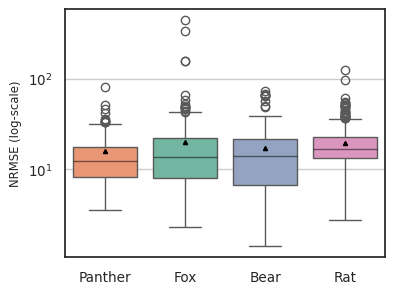

In [19]:
import seaborn
import seaborn as sns

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      #'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#sns.set_theme()
seaborn.set(style='white', font_scale=0.7)

plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()
#test_agg1.building_type = test_agg1.building_type.str.capitalize()
test_agg1.NRMSE = test_agg1.NRMSE * 100
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
test_agg1.site = test_agg1.site.str.capitalize()


# Find the order
my_order = test_agg1.groupby(by=["site"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='site', y='NRMSE', fill=True, hue='site', order=my_order,                       
                medianprops=dict(color="black", alpha=0.5),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1)
res.tick_params(labelsize=9.8)
res.set_yscale('log') 
plt.title(label='')

plt.ylabel("NRMSE (log-scale)")
# plt.ylim(0,120)
plt.xlabel("")
#plt.xticks(rotation=90)
#plt.grid(True)
plt.grid(axis='y')

plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-bdg-error-site-boxplot.pdf", bbox_inches='tight')
plt.show()

In [55]:
test_agg1 = combined.copy()
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
cols = ['result_type', 'site', 'NRMSE']
res_agg2 = test_agg1[cols].groupby(['result_type', 'site']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})
res_agg2

NRMSE
                       median
result_type site             
Fine-tuned  Bear     0.154964
            Fox      0.159296
            Panther  0.143814
            Rat      0.211261
Zero-shot   Bear     0.273150
            Fox      0.239225
            Panther  0.207740
            Rat      0.246127